Предсказание кассовых сборов TMDB

Предсказание общего дохода от продажи фильмов в мире.

В мире где кинофильмы заработали в 2018 году 41,7 млрд. долларов, киноиндустрия стала популярнее, чем когда-либо. Но какие фильмы приносят больше всего денег в кассах? Насколько важен директор? Или бюджет? 

В современном мире очень важно понимать экономически выгодно ли снять фильм.На данном этапе развития киноиндустрии бюджеты фильмов крайне велики, что говорит о том что инвестиции в фильмы относятся к категории рисковых инвестиций. Поэтому необходимо создание математических моделей, позволяющих оценивать степени риска неокупаемости кинопроекта.

id(3000) - id фильма

belongs_to_collection (604) - указывает на принадлежание к какой-либо коллекции

budget (2188) - бюджет картины

genres (2993) - список жанров фильма

homepage (946) - сайт о фильме

imdb_id (3000) - id на сервисе IMDB

original_language (3000) - аббревиатура страны фильма

original_title (3000) - Оригинальное название фильма (из страны производителя)

overview (2992) - Описание фильма на английском языке

popularity (3000) - популярность фильма на неизвестный день 

poster_path (2999) - путь к постеру фильма

production_companies (2844) - список компаний участвующих в создании фильма

production_countries (2945) - список стран участвующих в создании фильма

release_date (3000) - мировая дата релиза в формате (%m/%d/%y)

runtime (2998) - длительность фильма в 

spoken_languages (2980) - языки которые использовались в фильме

status (3000) - статус фильма Released или Rumored

tagline (2403) - слоган фильма

title (3000) - название фильма на английском языке

Keywords (2724) - список ключевых слов

cast (2987) - список каста

crew (2984) - список из титров (режиссеры, продюсеры, операторы и т.д.)

revenue (3000) - денег собрано

In [1]:
import pandas as pd
import matplotlib.pyplot as plt  
from tqdm import tqdm
from ast import literal_eval
import seaborn as sns
import re
import numpy as np
from sklearn.externals import joblib
from sklearn.preprocessing import MultiLabelBinarizer

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [8]:
train= pd.read_csv('train.csv')
train.describe()

,id,budget,popularity,runtime,revenue
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,1500.500000,2.253133e+07,8.463274,107.856571,6.672585e+07
std,866.169729,3.702609e+07,12.104000,22.086434,1.375323e+08
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,750.750000,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2250.250000,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09


In [12]:
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


Text(0.5, 1.0, 'Missing Value count By Features')

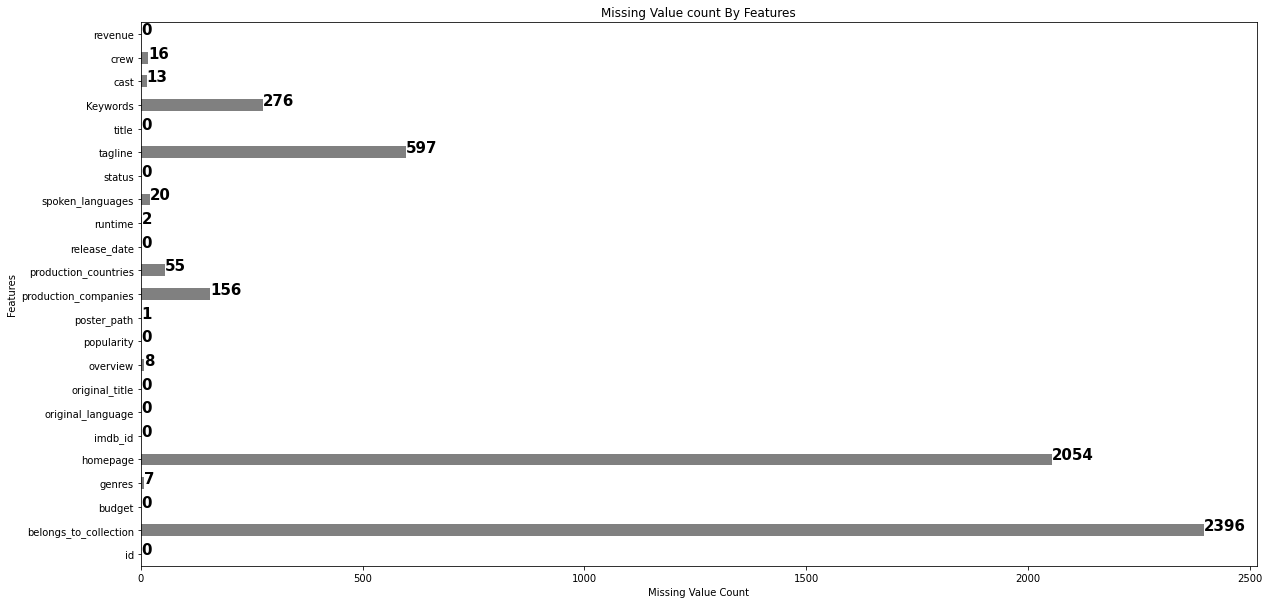

In [10]:
train.isna().sum().plot(kind="barh", figsize=(20,10),color='grey')
for i, v in enumerate(train.isna().sum()):
    plt.text(v, i, str(v), fontweight='bold', fontsize = 15)
plt.xlabel("Missing Value Count")
plt.ylabel("Features")
plt.title("Missing Value count By Features")

Text(0, 0.5, 'revenue')

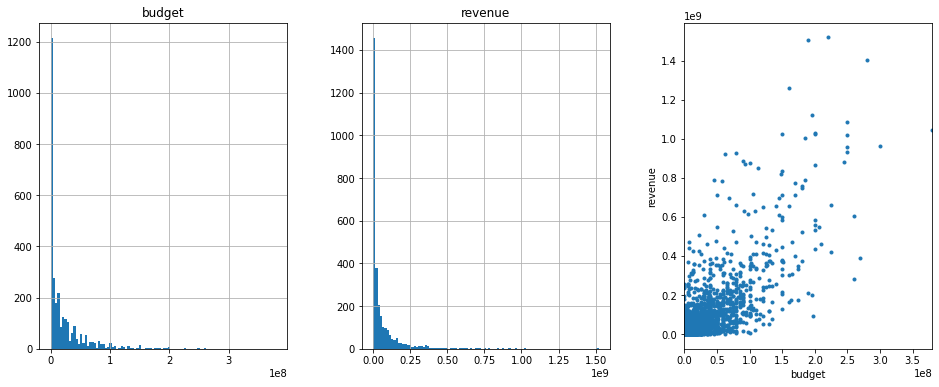

In [14]:
plt.figure(figsize=(16,6));
ax1 = plt.subplot(131)
train.hist('budget',bins=100,ax=ax1)
ax2 = plt.subplot(132)
train.hist('revenue',bins=100,ax=ax2)
ax3 = plt.subplot(133)
train.plot(x='budget',y='revenue',style='.',ax=ax3,legend=False)
plt.ylabel('revenue')


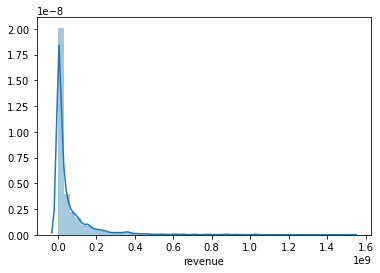

In [16]:
sns.distplot(train['revenue'])

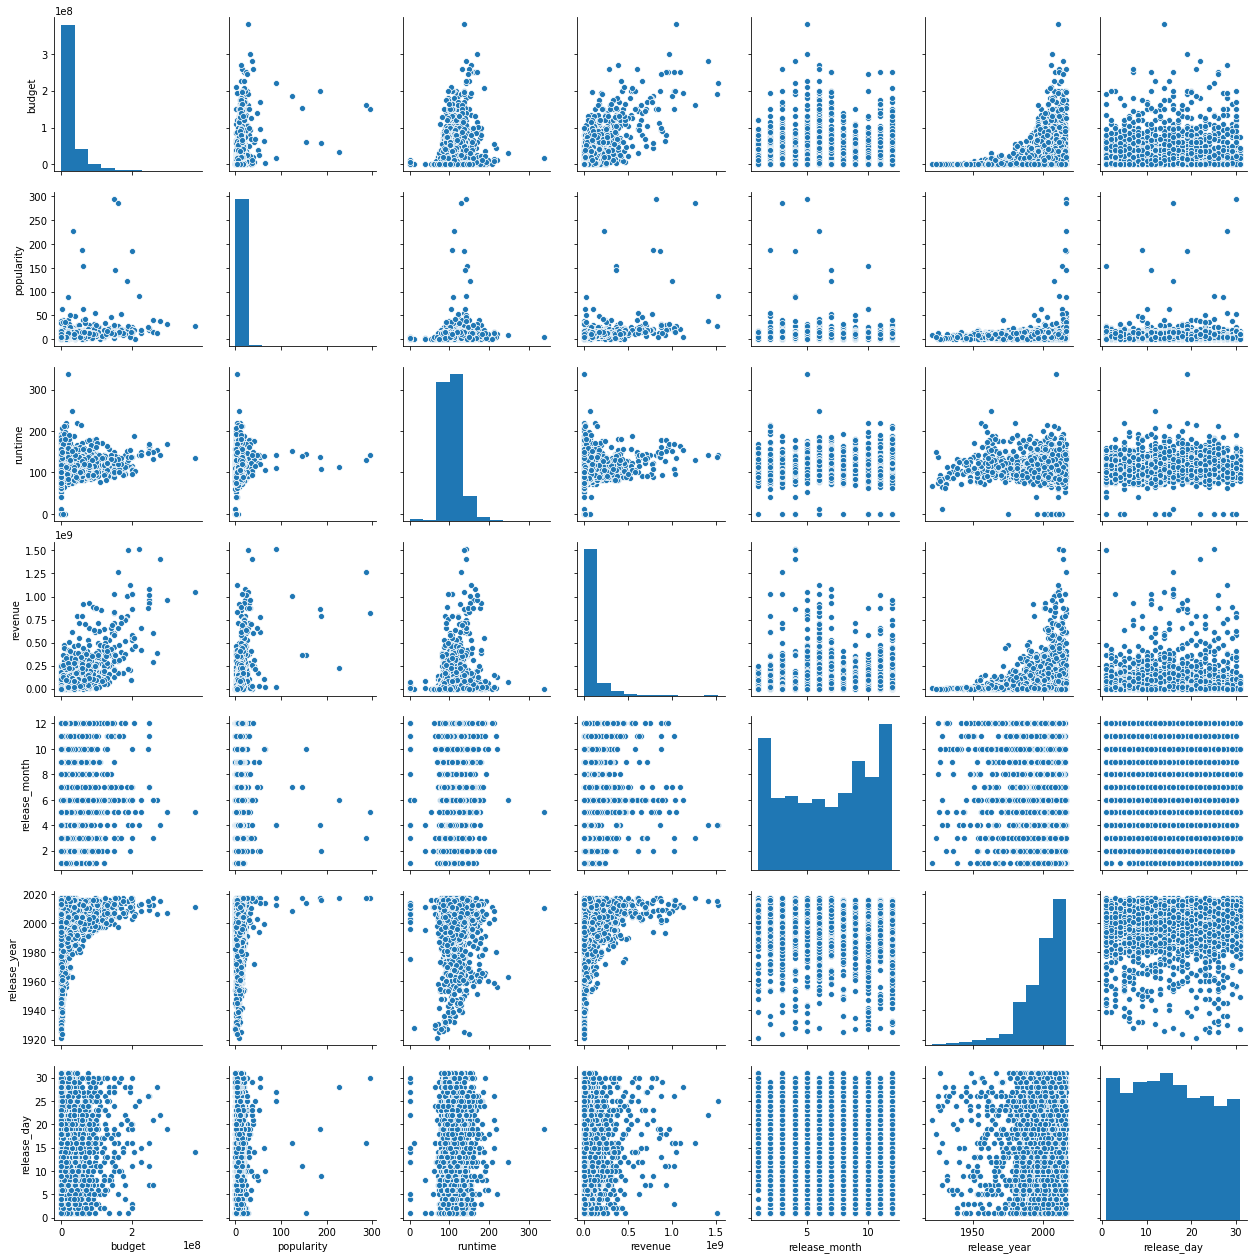

In [28]:
train_numer = train.select_dtypes(['number']).drop(['id'], axis=1).fillna(0)
sns.pairplot(train_numer)

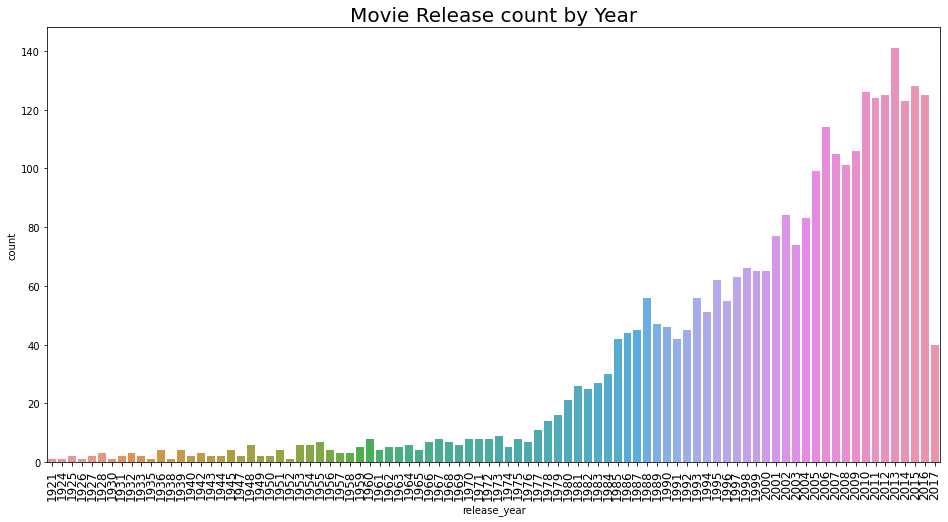

In [37]:
plt.figure(figsize=(16,8))
sns.countplot(train['release_year'].sort_values())
plt.title("Movie Release count by Year", fontsize=20)
loc, labels = plt.xticks()
plt.xticks(fontsize=12, rotation=90)
plt.show()

Каждый год производство фильмов увеличивается

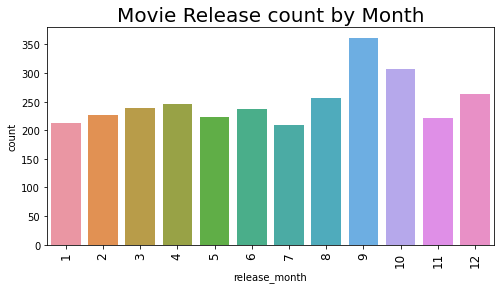

In [39]:
plt.figure(figsize=(8,4))
sns.countplot(train['release_month'].sort_values())
plt.title("Movie Release count by Month", fontsize=20)
loc, labels = plt.xticks()
plt.xticks(fontsize=12, rotation=90)
plt.show()

Наиболее популярный месяц для выпуска фильма - сентябрь

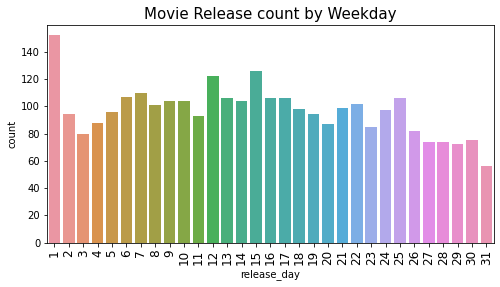

In [41]:
plt.figure(figsize=(8,4))
sns.countplot(train['release_day'].sort_values())
plt.title("Movie Release count by Weekday", fontsize=15)
loc, labels = plt.xticks()
plt.xticks(fontsize=12, rotation=90)
plt.show()

Первое число месяца - самый популярный день для выпуска фильма

Средний доход по языкам

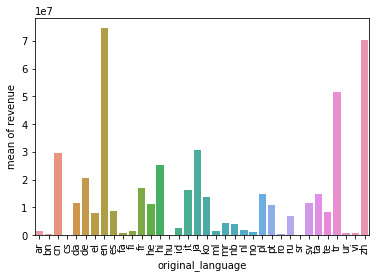

In [43]:
revenue_by_lang = train.groupby('original_language')['revenue'].aggregate([np.mean])
revenue_by_lang.reset_index(inplace=True)
fig = sns.barplot(x='original_language', y='mean', data=revenue_by_lang)
fig.set(ylabel='mean of revenue')
_ = fig.set_xticklabels(fig.get_xticklabels(), rotation=90)

Наиболее популярный язык - английский, далее идут китайский, турецкий и японский

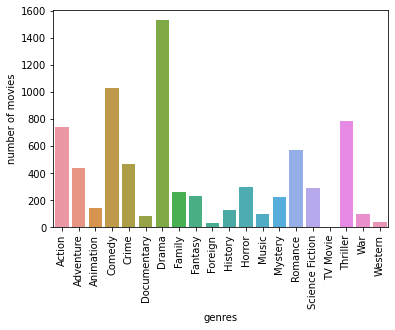

In [47]:
# количество фильмов в разных жанрах
movies_by_genre = pd.DataFrame(genres.sum(axis=0)).reset_index()
movies_by_genre.columns = ['genres', 'movies']
fig = sns.barplot(x='genres', y='movies', data=movies_by_genre)
fig.set(ylabel='number of movies')
_ = fig.set_xticklabels(fig.get_xticklabels(), rotation=90)

Наиболее часто выпускаемые фильмы в категории драма, также комедия, триллеры и боевики

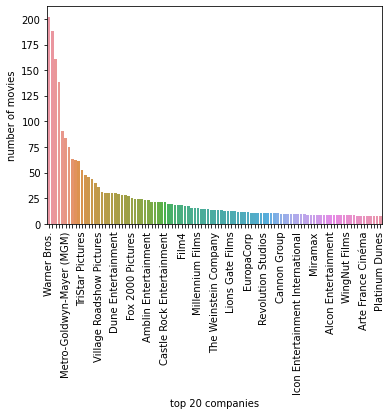

In [53]:
#количество фильмов по производственным компаниям
movies_by_companies = pd.DataFrame(companies.sum(axis=0)).reset_index()
movies_by_companies.columns = ['company', 'movies']
top_100_companies = movies_by_companies.sort_values(by='movies', ascending=False).reset_index().loc[0:100]
fig = sns.barplot(x='company', y='movies', data=top_100_companies)
fig.set(ylabel='number of movies', xlabel='top 20 companies')
_ = fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
for index, label in enumerate(fig.xaxis.get_ticklabels()):
    if index % 5 != 0:
        label.set_visible(False)

Чаще всего выпускаю фильмы такие компании, как Warner Bross, Metro-Golden-mayer

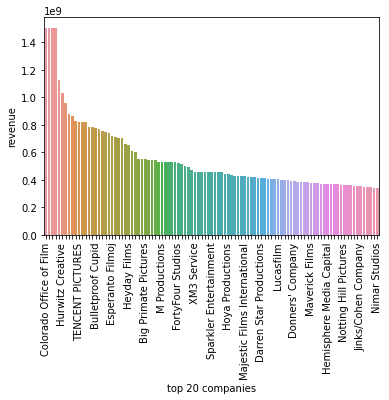

In [55]:
#доход от фильмов по компаниям
revenue_by_companies = list()
for col in companies.columns:
    revenue_by_companies.append([col, train.loc[companies[col]==1, 'revenue'].median()])
revenue_by_companies = pd.DataFrame(revenue_by_companies, columns=['company', 'revenue'])
top_100_companies = revenue_by_companies.sort_values(by='revenue', ascending=False).reset_index().loc[0:100]
fig = sns.barplot(x='company', y='revenue', data=top_100_companies)
fig.set(xlabel='top 20 companies')
_ = fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
for index, label in enumerate(fig.xaxis.get_ticklabels()):
    if index % 5 != 0:
        label.set_visible(False)

Компании, которые получают наибольшие доходы от фильмов - Colorado office of film, Hurwitz Creative

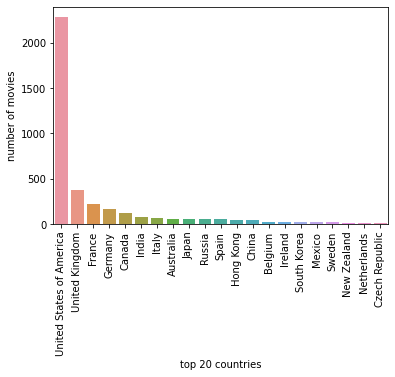

In [59]:
#топ по числу фильмов
movies_by_countries = pd.DataFrame(countries.sum(axis=0)).reset_index()
movies_by_countries.columns = ['countries', 'movies']
top_20_countries = movies_by_countries.sort_values(by='movies', ascending=False).reset_index().loc[0:20]
fig = sns.barplot(x='countries', y='movies', data=top_20_countries)
fig.set(ylabel='number of movies', xlabel='top 20 countries')
_ = fig.set_xticklabels(fig.get_xticklabels(), rotation=90)

Страны, выпускающие фильмы чаще всего -Америка, Великобритания

[Text(0.5, 0, 'top 20 countries')]

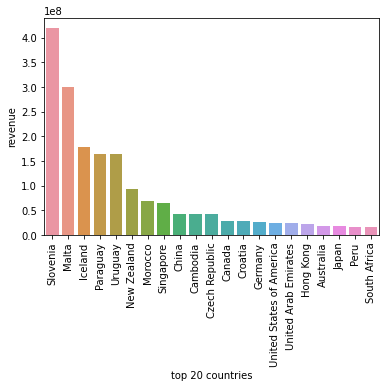

In [61]:
#20 лучших стран по доходам
revenue_by_countries = list()
for col in countries.columns:
    revenue_by_countries.append([col, train.loc[countries[col]==1, 'revenue'].median()])
revenue_by_countries = pd.DataFrame(revenue_by_countries, columns=['country', 'revenue'])
top_20_countries = revenue_by_countries.sort_values(by='revenue', ascending=False).reset_index().loc[0:20]
fig = sns.barplot(x='country', y='revenue', data=top_20_countries)
_ = fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
fig.set(xlabel='top 20 countries')

In [66]:
#Toп 20 языки с самым высоким доходом от фильмов
train.loc[train.spoken_languages.isnull(), 'spoken_languages'] = "{}"
train['spoken_languages'] = train.spoken_languages.apply(lambda x: sorted([d['name'] for d in eval(x)])).apply(lambda x: ','.join(map(str, x)))
languages = train.spoken_languages.str.get_dummies(sep=',')

C:\Users\asus\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\asus\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 26412 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\asus\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 35486 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\asus\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 26222 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\asus\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 36890 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\asus\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 35805 missing from current

C:\Users\asus\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 51312 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\asus\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 49440 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\asus\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 47568 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\asus\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 24191 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\asus\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 24030 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\asus\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 24291 missing from current font.
  f

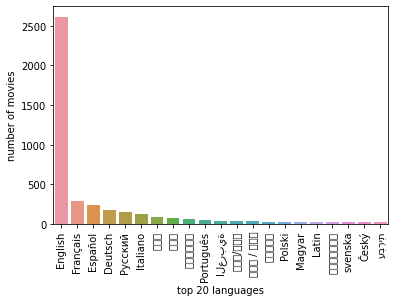

In [68]:
movies_by_languages = pd.DataFrame(languages.sum(axis=0)).reset_index()
movies_by_languages.columns = ['language', 'movies']
top_20_languages = movies_by_languages.sort_values(by='movies', ascending=False).reset_index().loc[0:20]
fig = sns.barplot(x='language', y='movies', data=top_20_languages)
fig.set(ylabel='number of movies', xlabel='top 20 languages')
_ = fig.set_xticklabels(fig.get_xticklabels(), rotation=90)

Самый популярный язык - английский, далее французский и испанский

C:\Users\asus\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 3616 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\asus\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 3634 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\asus\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 3625 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\asus\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 3652 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\asus\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 3607 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\asus\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 3618 missing from current font.

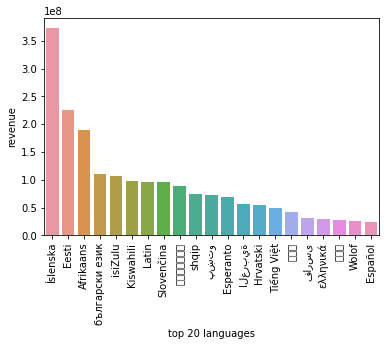

In [70]:
#Топ 20 лучших языков с самым низким доходом от фильмов
revenue_by_languages = list()
for col in languages.columns:
    revenue_by_languages.append([col, train.loc[languages[col]==1, 'revenue'].median()])
revenue_by_languages = pd.DataFrame(revenue_by_languages, columns=['language', 'revenue'])
top_20_languages = revenue_by_languages.sort_values(by='revenue', ascending=False).reset_index().loc[0:20]
fig = sns.barplot(x='language', y='revenue', data=top_20_languages)
fig.set(xlabel='top 20 languages')
_ = fig.set_xticklabels(fig.get_xticklabels(), rotation=90)

Языки с самым низким доходом от фильмов - исландский, эстонский

Text(0, 0.5, 'revenue')

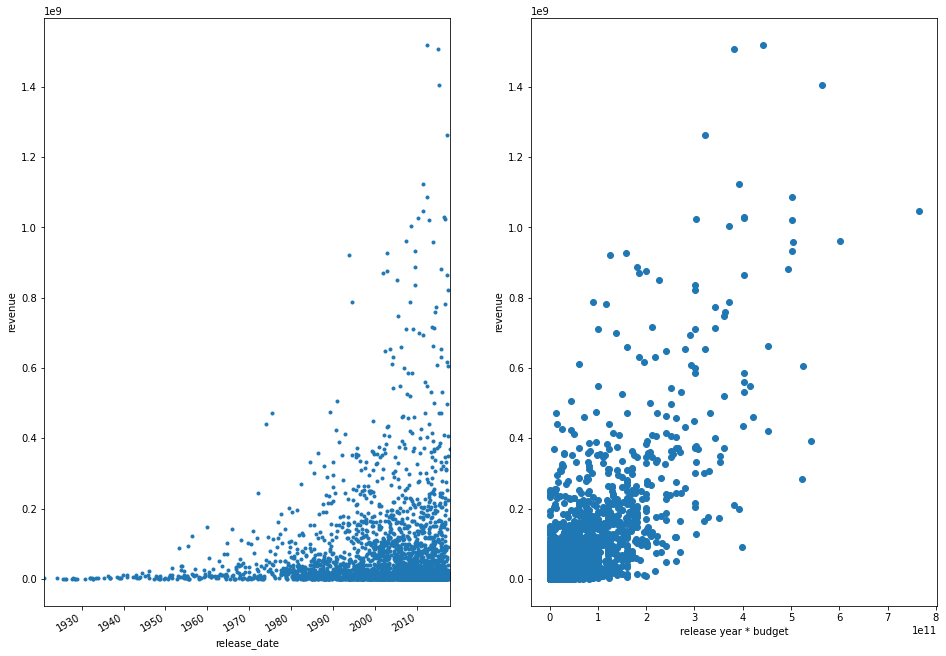

In [72]:
#разброс доходов от сюжета против даты выпуска и года выпуска * бюджет
plt.figure(figsize=(16,12))
ax1 = plt.subplot(121)
train.plot('release_date','revenue',style='.',ax=ax1,legend=False)
plt.ylabel('revenue')
ax2 = plt.subplot(122)
plt.scatter(x=train['release_year']*train['budget'],y=train['revenue'])
plt.xlabel('release year * budget')
plt.ylabel('revenue')

Text(0.5, 1.0, 'Mean Popularity Over Years')

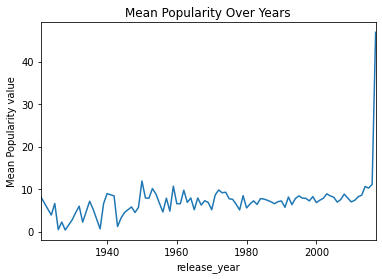

In [73]:
#Значительная популярность за годы
release_year_mean_data=train.groupby(['release_year'])['budget','popularity','revenue'].mean()
release_year_mean_data.head()

fig = plt.figure(figsize=(6, 4))
release_year_mean_data['popularity'].plot(kind='line')
plt.ylabel('Mean Popularity value')
plt.title('Mean Popularity Over Years')

Таким образом можем сказать, что с каждый годом производство фильмов растет. Наиболее популярными являются фильмы, выпущенные в америке